<a href="https://colab.research.google.com/github/amityadav108/amityadav108/blob/main/Project_Neural_Network_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 4: NEURAL NETWORK
##### Module 11: Project – Neural Network for Image Recognition of Letters A, B, and C


## Implementation of neural network from scratch using Numpy

In [ ]:
# dataset
#A
A = [0,0,1,1,0,0,
    0,1,0,0,1,0,
    1,1,1,1,1,1,
    1,0,0,0,0,1,
    1,0,0,0,0,1]
#B
B = [0,1,1,1,1,0,
    0,1,0,0,1,0,
    0,1,1,1,1,0,
    0,1,0,0,1,0,
    0,1,1,1,1,0]
#C
C = [0,1,1,1,1,0,
    0,1,0,0,0,0,
    0,1,0,0,0,0,
    0,1,0,0,0,0,
    0,1,1,1,1,0]

In [ ]:
# create labels
y = [[1,0,0],
    [0,1,0],
    [0,0,1]]

In [ ]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt

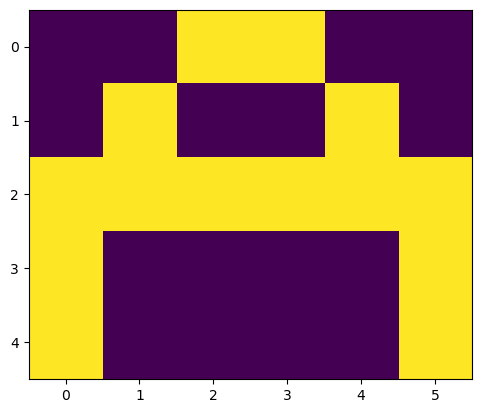

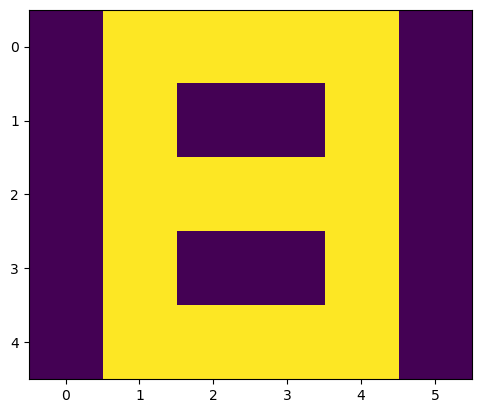

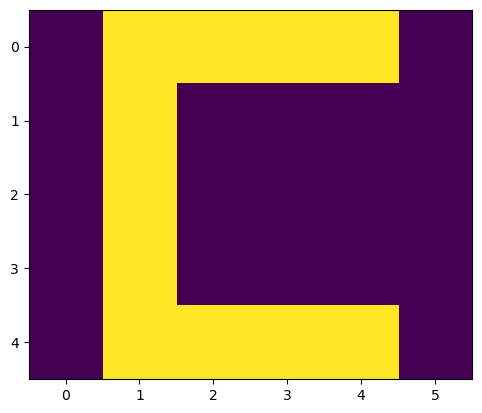

In [ ]:
# visualize the data
plt.imshow(np.array(A).reshape(5,6))  # For A letter
plt.show()
plt.imshow(np.array(B).reshape(5,6))  # For B letter
plt.show()
plt.imshow(np.array(C).reshape(5,6))  # For C letter
plt.show()


In [ ]:
# convert data and labels into numpy array
x = [np.array(A).reshape(1,30), np.array(B).reshape(1,30), np.array(C).reshape(1,30)]
y = np.array(y)

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
# input (1,30)
# hidden(1,5)
# output(3,3)

In [ ]:
# activation function

def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [ ]:
# creating feed forward NN
def f_forward(x,w1,w2):
    # hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)

In [ ]:
# initialize the weights
def generate_wt(x,y):
    l = []
    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))

In [ ]:
def loss(out, Y):
    s = (np.square(out - Y))
    s = np.sum(s) / len(Y)
    return s

In [ ]:
def back_prop(x, y, w1, w2, alpha):
    # Hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    # Output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    # Gradients
    d2 = a2 - y
    d1 = np.multiply((w2.dot(d2.T)).T, np.multiply(a1, 1 - a1))

    w1_adj = x.reshape(-1,1).dot(d1.reshape(1,-1))
    w2_adj = a1.reshape(-1,1).dot(d2.reshape(1,-1))

    w1 = w1 - alpha * w1_adj
    w2 = w2 - alpha * w2_adj

    return w1, w2


In [ ]:
def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    losses = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append(loss(out, Y[i]))
            w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
        avg_loss = sum(l)/len(x)
        accuracy = (1 - avg_loss) * 100
        print("Epoch:", j+1, "acc:", accuracy)
        acc.append(accuracy)
        losses.append(avg_loss)
    return acc, losses, w1, w2

In [ ]:
def predict(x,w1,w2):
    Out = f_forward(x,w1,w2)
    maxm =0
    k=0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A")
    elif(k == 1):
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5,6))
    plt.show()

In [ ]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1, "\n", w2)


[[-1.9690233  -0.18475348 -0.49591108  0.51828657 -1.53427808]
 [-0.08144736  1.03407922 -0.44931407  1.05908336  1.55500158]
 [ 1.57923888 -0.46809393 -0.83378446 -0.55702594 -0.99395856]
 [ 0.82655458  0.78678026 -0.07350172  0.33177065  1.76289859]
 [ 0.58197016  0.30241163  0.05384852  0.70035293  0.97813214]
 [ 0.41939906  1.38805626  0.55912835  0.29761592  1.653063  ]
 [ 1.286551   -0.9112848  -0.13115055  1.58962157 -0.20741411]
 [ 0.60808429 -1.90518185 -0.32600858  0.86865524 -1.72565929]
 [ 0.64293551 -0.95581626  0.5545294  -0.5145336  -1.65880384]
 [ 0.19543113 -0.37350708 -1.29825449  0.39467761 -0.19923567]
 [ 0.96200561  2.82005605  1.68311517  1.14520083 -0.31333616]
 [ 0.8314749  -0.56667495 -2.28808424 -0.45765985 -0.44167556]
 [-1.29953417  0.19855532 -0.37871999 -1.17636408  1.36899817]
 [ 0.05201929 -1.09660215 -0.47879037  0.43355832  1.36025373]
 [ 1.81403966 -1.99134791  0.83756789  0.71884305  0.38949531]
 [-0.75105487  0.02832853  0.30158574 -0.52112693 -1.21

In [ ]:
acc, loss, w1, w2, = train(x,y,w1,w2, 0.1,100)

Epoch: 1 acc: 70.14860256974774
Epoch: 2 acc: 72.95395422179327
Epoch: 3 acc: 75.16263347128394
Epoch: 4 acc: 76.82624134351687
Epoch: 5 acc: 78.11877241317792
Epoch: 6 acc: 79.18889409912217
Epoch: 7 acc: 80.12972153239528
Epoch: 8 acc: 80.99400046203385
Epoch: 9 acc: 81.81016789589431
Epoch: 10 acc: 82.59258276737816
Epoch: 11 acc: 83.34754500058568
Epoch: 12 acc: 84.0768684412369
Epoch: 13 acc: 84.78003800812677
Epoch: 14 acc: 85.45551582776869
Epoch: 15 acc: 86.10152620431779
Epoch: 16 acc: 86.71652115549054
Epoch: 17 acc: 87.2994465520586
Epoch: 18 acc: 87.84987478450348
Epoch: 19 acc: 88.36803826403184
Epoch: 20 acc: 88.8547849744092
Epoch: 21 acc: 89.31147635738617
Epoch: 22 acc: 89.7398511614992
Epoch: 23 acc: 90.1418800168809
Epoch: 24 acc: 90.51963171976587
Epoch: 25 acc: 90.87516467903272
Epoch: 26 acc: 91.21044867994836
Epoch: 27 acc: 91.527315597813
Epoch: 28 acc: 91.82743397142991
Epoch: 29 acc: 92.11230113259941
Epoch: 30 acc: 92.38324700032929
Epoch: 31 acc: 92.64144481

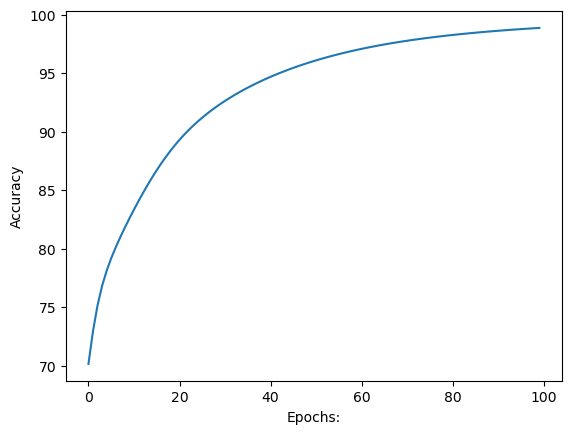

In [ ]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt1.show()

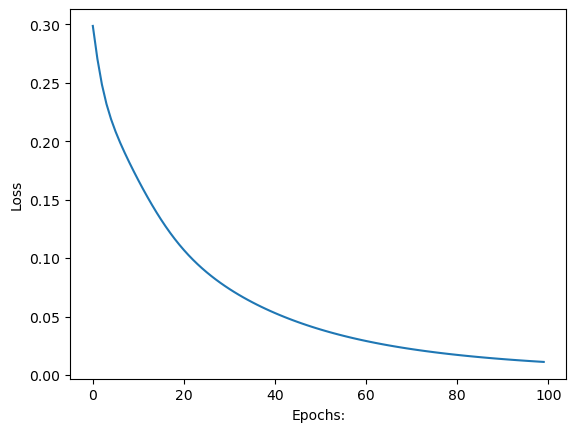

In [ ]:
# plt loss
plt1.plot(loss)
plt.ylabel("Loss")
plt.xlabel("Epochs:")
plt1.show()

In [ ]:
print(w1, "\n", w2)

[[-1.9690233  -0.18475348 -0.49591108  0.51828657 -1.53427808]
 [-0.14002714  1.36746756 -0.52398697  0.77932969  1.48529696]
 [ 1.71307767 -0.17842162 -0.8395331  -0.77973469 -0.92732751]
 [ 0.96039336  1.07645257 -0.07925036  0.10906191  1.82952964]
 [ 0.52339038  0.63579997 -0.02082438  0.42059926  0.90842752]
 [ 0.41939906  1.38805626  0.55912835  0.29761592  1.653063  ]
 [ 1.286551   -0.9112848  -0.13115055  1.58962157 -0.20741411]
 [ 0.74192307 -1.61550954 -0.33175722  0.6459465  -1.65902824]
 [ 0.64293551 -0.95581626  0.5545294  -0.5145336  -1.65880384]
 [ 0.19543113 -0.37350708 -1.29825449  0.39467761 -0.19923567]
 [ 1.19335582  3.02719472  1.88221512  1.32748419 -1.1046112 ]
 [ 0.8314749  -0.56667495 -2.28808424 -0.45765985 -0.44167556]
 [-1.10711561  0.1548393  -0.30979574 -1.11931915  1.50533383]
 [ 0.18585808 -0.80692983 -0.48453902  0.21084958  1.42688477]
 [ 2.04538987 -1.78420924  1.03666784  0.90112642 -0.40177972]
 [-0.51970466  0.2354672   0.50068569 -0.33884357 -2.00

Image is of letter A


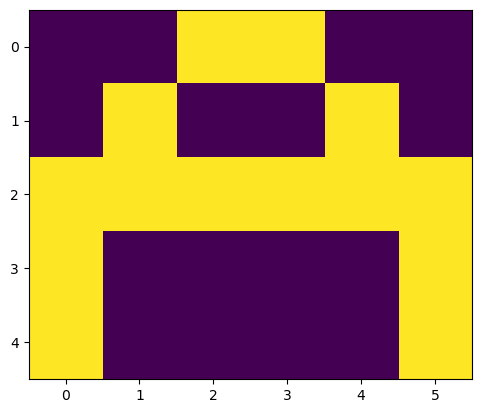

In [ ]:
predict(x[0], w1, w2)

Image is of letter B


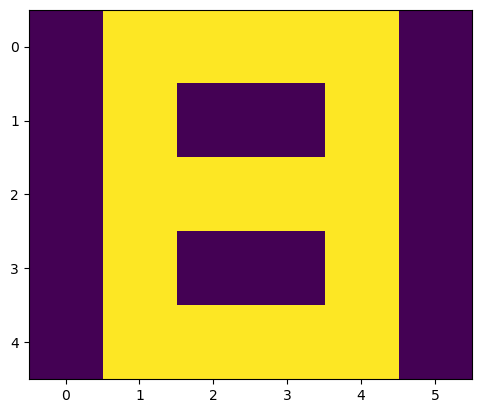

In [ ]:
predict(x[1], w1, w2)

Image is of letter C


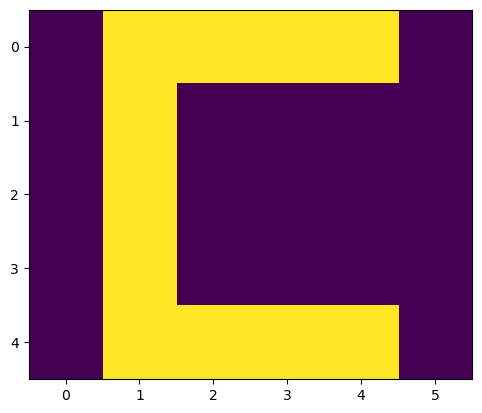

In [ ]:
predict(x[2], w1, w2)